<a href="https://colab.research.google.com/github/palash04/Artificial-Intelligence/blob/master/NN_with_Keras/_04_Overfitting_Underfitting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Overfitting and Underfitting

In [1]:
import keras
keras.__version__

'2.4.3'

In [4]:
from keras.datasets import imdb
import numpy as np

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words = 10000)

def vectorize_sequences(sequences, dimension=10000):
  results = np.zeros((len(sequences), dimension))

  for i, sequence in enumerate(sequences):
    results[i, sequence] = 1.
  
  return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [8]:
from keras import models, layers

original_model = models.Sequential()
original_model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
original_model.add(layers.Dense(16, activation='relu'))
original_model.add(layers.Dense(1, activation='sigmoid'))

original_model.compile(optimizer='rmsprop',
                      loss='binary_crossentropy',
                      metrics=['acc'])

In [12]:
smaller_model = models.Sequential()
smaller_model.add(layers.Dense(4, activation='relu', input_shape=(10000,)))
smaller_model.add(layers.Dense(4, activation='relu'))
smaller_model.add(layers.Dense(1, activation='sigmoid'))

smaller_model.compile(optimizer='rmsprop',
                     loss='binary_crossentropy',
                     metrics=['acc'])

In [10]:
original_hist = original_model.fit(x_train, y_train, epochs=20, batch_size=512, validation_data=(x_test,y_test))

Epoch 1/20
49/49 [==============================] - 4s 81ms/step - loss: 0.4573 - acc: 0.8175 - val_loss: 0.3387 - val_acc: 0.8786
Epoch 2/20
49/49 [==============================] - 3s 52ms/step - loss: 0.2609 - acc: 0.9087 - val_loss: 0.2961 - val_acc: 0.8833
Epoch 3/20
49/49 [==============================] - 3s 52ms/step - loss: 0.2005 - acc: 0.9289 - val_loss: 0.2810 - val_acc: 0.8870
Epoch 4/20
49/49 [==============================] - 3s 51ms/step - loss: 0.1686 - acc: 0.9391 - val_loss: 0.2917 - val_acc: 0.8858
Epoch 5/20
49/49 [==============================] - 3s 53ms/step - loss: 0.1437 - acc: 0.9512 - val_loss: 0.3344 - val_acc: 0.8709
Epoch 6/20
49/49 [==============================] - 3s 53ms/step - loss: 0.1276 - acc: 0.9556 - val_loss: 0.3291 - val_acc: 0.8775
Epoch 7/20
49/49 [==============================] - 3s 53ms/step - loss: 0.1129 - acc: 0.9609 - val_loss: 0.3532 - val_acc: 0.8732
Epoch 8/20
49/49 [==============================] - 3s 52ms/step - loss: 0.0969 - a

In [13]:
smaller_hist = smaller_model.fit(x_train, y_train, epochs=20, batch_size=512, validation_data=(x_test,y_test))

Epoch 1/20
49/49 [==============================] - 2s 50ms/step - loss: 0.6062 - acc: 0.6770 - val_loss: 0.5585 - val_acc: 0.7600
Epoch 2/20
49/49 [==============================] - 2s 36ms/step - loss: 0.5117 - acc: 0.8238 - val_loss: 0.5052 - val_acc: 0.8506
Epoch 3/20
49/49 [==============================] - 2s 36ms/step - loss: 0.4576 - acc: 0.8792 - val_loss: 0.4707 - val_acc: 0.8594
Epoch 4/20
49/49 [==============================] - 2s 37ms/step - loss: 0.4162 - acc: 0.9047 - val_loss: 0.4497 - val_acc: 0.8590
Epoch 5/20
49/49 [==============================] - 2s 38ms/step - loss: 0.3807 - acc: 0.9216 - val_loss: 0.4248 - val_acc: 0.8800
Epoch 6/20
49/49 [==============================] - 2s 37ms/step - loss: 0.3471 - acc: 0.9341 - val_loss: 0.4043 - val_acc: 0.8815
Epoch 7/20
49/49 [==============================] - 2s 37ms/step - loss: 0.3096 - acc: 0.9440 - val_loss: 0.3826 - val_acc: 0.8798
Epoch 8/20
49/49 [==============================] - 2s 37ms/step - loss: 0.2672 - a

In [16]:
print (original_hist.history.keys())
print (smaller_hist.history.keys())

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])
dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])


In [18]:
epochs = range(1, 21)
original_val_loss = original_hist.history['val_loss']
smaller_model_val_loss = smaller_hist.history['val_loss']

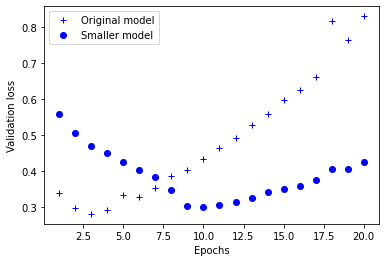

In [19]:
import matplotlib.pyplot as plt

# b+ is for "blue cross"
plt.plot(epochs, original_val_loss, 'b+', label='Original model')
# "bo" is for "blue dot"
plt.plot(epochs, smaller_model_val_loss, 'bo', label='Smaller model')
plt.xlabel('Epochs')
plt.ylabel('Validation loss')
plt.legend()

plt.show()

In [22]:
bigger_model = models.Sequential()
bigger_model.add(layers.Dense(512, activation='relu', input_shape=(10000,)))
bigger_model.add(layers.Dense(512, activation='relu'))
bigger_model.add(layers.Dense(1, activation='sigmoid'))

bigger_model.compile(optimizer='rmsprop',
                     loss='binary_crossentropy',
                     metrics=['acc'])

In [23]:
bigger_model_hist = bigger_model.fit(x_train, y_train, epochs=20, batch_size=512, validation_data=(x_test, y_test))

Epoch 1/20
49/49 [==============================] - 20s 411ms/step - loss: 0.4702 - acc: 0.7899 - val_loss: 0.4063 - val_acc: 0.8149
Epoch 2/20
49/49 [==============================] - 16s 323ms/step - loss: 0.2192 - acc: 0.9122 - val_loss: 0.3584 - val_acc: 0.8497
Epoch 3/20
49/49 [==============================] - 16s 325ms/step - loss: 0.1322 - acc: 0.9508 - val_loss: 0.3528 - val_acc: 0.8752
Epoch 4/20
49/49 [==============================] - 16s 320ms/step - loss: 0.0502 - acc: 0.9833 - val_loss: 1.1055 - val_acc: 0.7750
Epoch 5/20
49/49 [==============================] - 16s 322ms/step - loss: 0.0346 - acc: 0.9897 - val_loss: 2.3285 - val_acc: 0.6738
Epoch 6/20
49/49 [==============================] - 16s 320ms/step - loss: 0.0384 - acc: 0.9914 - val_loss: 0.6773 - val_acc: 0.8816
Epoch 7/20
49/49 [==============================] - 16s 323ms/step - loss: 0.0861 - acc: 0.9874 - val_loss: 0.5957 - val_acc: 0.8804
Epoch 8/20
49/49 [==============================] - 16s 323ms/step - 

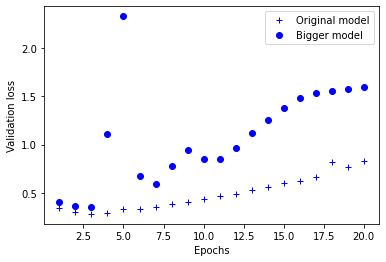

In [24]:
bigger_model_val_loss = bigger_model_hist.history['val_loss']

plt.plot(epochs, original_val_loss, 'b+', label='Original model')
plt.plot(epochs, bigger_model_val_loss, 'bo', label='Bigger model')
plt.xlabel('Epochs')
plt.ylabel('Validation loss')
plt.legend()
plt.show()

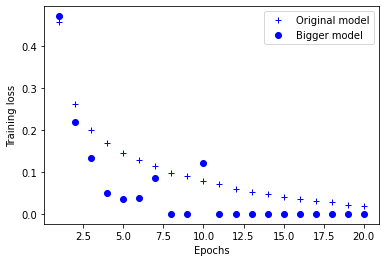

In [25]:
original_train_loss = original_hist.history['loss']
bigger_model_train_loss = bigger_model_hist.history['loss']

plt.plot(epochs, original_train_loss, 'b+', label='Original model')
plt.plot(epochs, bigger_model_train_loss, 'bo', label='Bigger model')
plt.xlabel('Epochs')
plt.ylabel('Training loss')
plt.legend()

plt.show()

In [26]:
# Regularzation
from keras import regularizers

l2_model = models.Sequential()
l2_model.add(layers.Dense(16, kernel_regularizer=regularizers.l2(0.001),
                          activation='relu', input_shape=(10000,)))
l2_model.add(layers.Dense(16, kernel_regularizer=regularizers.l2(0.001),
                          activation='relu'))
l2_model.add(layers.Dense(1, activation='sigmoid'))

In [27]:
l2_model.compile(optimizer='rmsprop',
                 loss='binary_crossentropy',
                 metrics=['acc'])

In [28]:
l2_model_hist = l2_model.fit(x_train, y_train,
                             epochs=20,
                             batch_size=512,
                             validation_data=(x_test, y_test))

Epoch 1/20
49/49 [==============================] - 5s 94ms/step - loss: 0.5001 - acc: 0.8194 - val_loss: 0.3860 - val_acc: 0.8807
Epoch 2/20
49/49 [==============================] - 2s 38ms/step - loss: 0.3217 - acc: 0.9047 - val_loss: 0.3361 - val_acc: 0.8898
Epoch 3/20
49/49 [==============================] - 2s 38ms/step - loss: 0.2768 - acc: 0.9208 - val_loss: 0.3371 - val_acc: 0.8862
Epoch 4/20
49/49 [==============================] - 2s 38ms/step - loss: 0.2575 - acc: 0.9267 - val_loss: 0.3416 - val_acc: 0.8832
Epoch 5/20
49/49 [==============================] - 2s 38ms/step - loss: 0.2409 - acc: 0.9338 - val_loss: 0.3472 - val_acc: 0.8822
Epoch 6/20
49/49 [==============================] - 2s 38ms/step - loss: 0.2362 - acc: 0.9340 - val_loss: 0.3531 - val_acc: 0.8806
Epoch 7/20
49/49 [==============================] - 2s 37ms/step - loss: 0.2275 - acc: 0.9384 - val_loss: 0.3657 - val_acc: 0.8764
Epoch 8/20
49/49 [==============================] - 2s 39ms/step - loss: 0.2234 - a

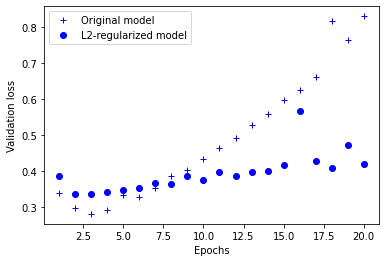

In [29]:
l2_model_val_loss = l2_model_hist.history['val_loss']

plt.plot(epochs, original_val_loss, 'b+', label='Original model')
plt.plot(epochs, l2_model_val_loss, 'bo', label='L2-regularized model')
plt.xlabel('Epochs')
plt.ylabel('Validation loss')
plt.legend()

plt.show()

In [30]:
# Adding dropout
dpt_model = models.Sequential()
dpt_model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
dpt_model.add(layers.Dropout(0.5))
dpt_model.add(layers.Dense(16, activation='relu'))
dpt_model.add(layers.Dropout(0.5))
dpt_model.add(layers.Dense(1, activation='sigmoid'))

dpt_model.compile(optimizer='rmsprop',
                  loss='binary_crossentropy',
                  metrics=['acc'])

In [31]:
dpt_model_hist = dpt_model.fit(x_train, y_train,
                               epochs=20,
                               batch_size=512,
                               validation_data=(x_test, y_test))

Epoch 1/20
49/49 [==============================] - 3s 59ms/step - loss: 0.6003 - acc: 0.6652 - val_loss: 0.4789 - val_acc: 0.8644
Epoch 2/20
49/49 [==============================] - 2s 37ms/step - loss: 0.4706 - acc: 0.8117 - val_loss: 0.3832 - val_acc: 0.8795
Epoch 3/20
49/49 [==============================] - 2s 37ms/step - loss: 0.3907 - acc: 0.8658 - val_loss: 0.3213 - val_acc: 0.8886
Epoch 4/20
49/49 [==============================] - 2s 37ms/step - loss: 0.3365 - acc: 0.8918 - val_loss: 0.2971 - val_acc: 0.8894
Epoch 5/20
49/49 [==============================] - 2s 37ms/step - loss: 0.2923 - acc: 0.9086 - val_loss: 0.2948 - val_acc: 0.8897
Epoch 6/20
49/49 [==============================] - 2s 36ms/step - loss: 0.2547 - acc: 0.9186 - val_loss: 0.2898 - val_acc: 0.8871
Epoch 7/20
49/49 [==============================] - 2s 36ms/step - loss: 0.2324 - acc: 0.9278 - val_loss: 0.3173 - val_acc: 0.8858
Epoch 8/20
49/49 [==============================] - 2s 36ms/step - loss: 0.2105 - a

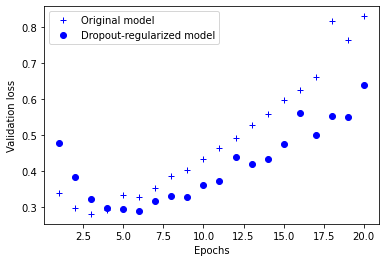

In [32]:
dpt_model_val_loss = dpt_model_hist.history['val_loss']

plt.plot(epochs, original_val_loss, 'b+', label='Original model')
plt.plot(epochs, dpt_model_val_loss, 'bo', label='Dropout-regularized model')
plt.xlabel('Epochs')
plt.ylabel('Validation loss')
plt.legend()

plt.show()